# Task: House Price Analysis and Prediction 
Submission: 15-07-2024 Submission date: 30-07-2024 

# Task-1  Data Cleaning and Exploration:


Import Libraries 

In [34]:
import numpy as np
import pandas as pd

Load the Dataset

In [35]:
df=pd.read_csv(r'D:\Data_science_Projects\Task-1\zameen-updated.csv')

Check Data set


In [36]:
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [37]:
df.dtypes

property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
area              object
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
Area Type         object
Area Size        float64
Area Category     object
dtype: object

# Clean the Data

Handle Missing Values:

In [38]:
df.isnull().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

Drop 'Agency' and 'agent' columns due to many missing  values

In [41]:
df.drop(columns=['agency','agent'], inplace=True)

Separate numeric columns

In [44]:
numeric_cols=df.select_dtypes(include='number').columns

fill missing values with mesian

In [47]:
df[numeric_cols]=df[numeric_cols].fillna(df[numeric_cols].median())

Drop rows with missing values in non-numeric columns

In [50]:
df.dropna(subset=df.select_dtypes(exclude='number').columns, inplace=True)

Convert Data Types

In [52]:
# Convert 'price' to numeric 
df['price']=pd.to_numeric(df['price'],errors='coerce')
# Convert 'date_added' to datetime
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')

Checking of duplicates

In [53]:
duplicate_rows=df[df.duplicated()]
duplicate_rows

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,Area Type,Area Size,Area Category


check num of duplicate rows 

In [54]:
num_duplictae_rows=len(duplicate_rows)
num_duplictae_rows

0

Identify and Handle Outliers

Use visualizations to identify outliers 

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualize outliers using a box plot

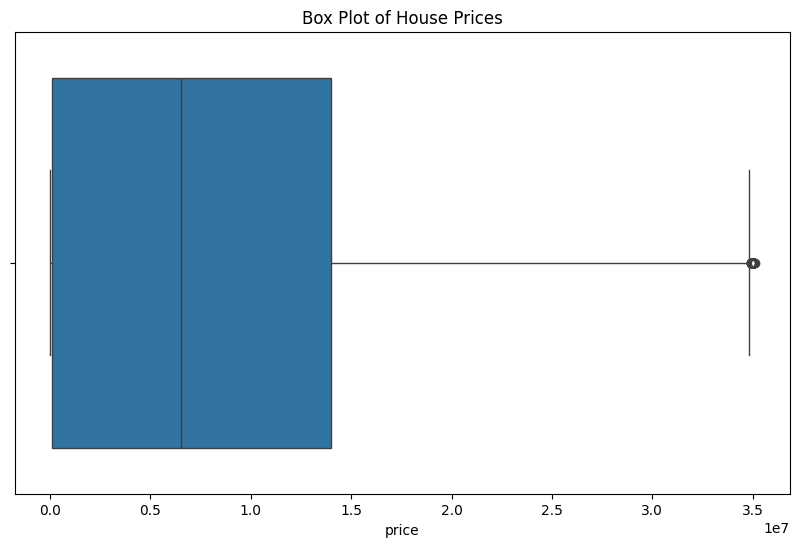

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of House Prices')
plt.show()

# Removing outliers using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

# Data Exploration
1. Analyze the Distribution of House Prices:

Histogram of house prices


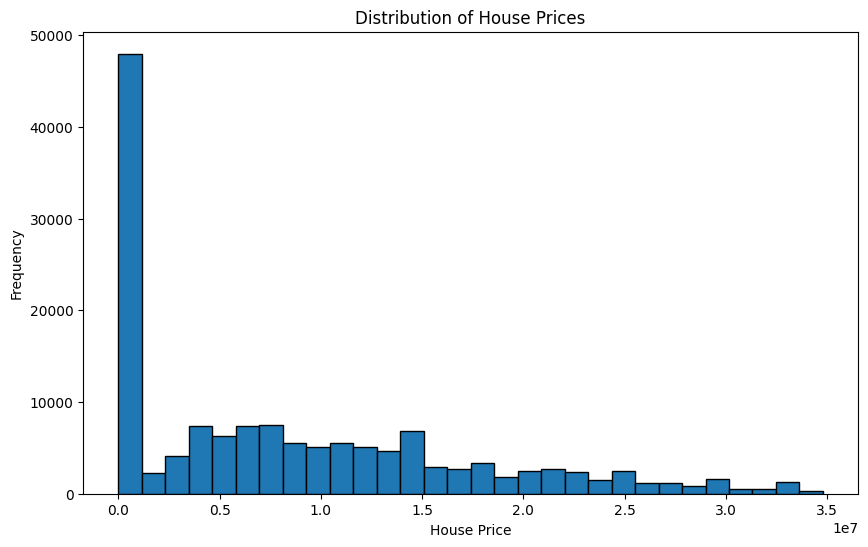

In [67]:
# Histogram of house prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='k')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()


Analyze Relationships Between Features and Price:

Use scatter plots for numerical features and box plots for categorical features to explore relationships.

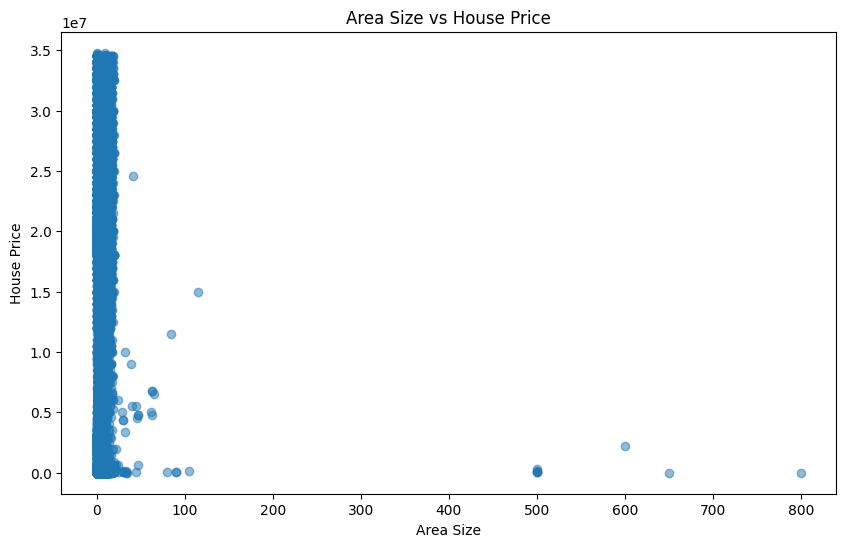

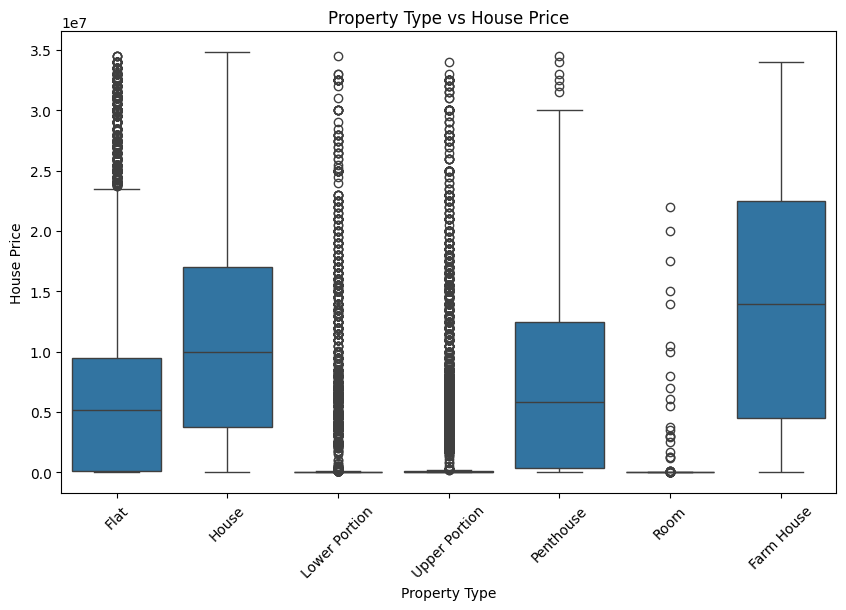

In [72]:
# Scatter plot for 'Area Size' vs 'price'
plt.figure(figsize=(10, 6))
plt.scatter(df['Area Size'], df['price'], alpha=0.5)
plt.xlabel('Area Size')
plt.ylabel('House Price')
plt.title('Area Size vs House Price')
plt.show()

# Box plot for 'property_type' vs 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['property_type'], y=df['price'])
plt.xlabel('Property Type')
plt.ylabel('House Price')
plt.title('Property Type vs House Price')
plt.xticks(rotation=45)
plt.show()


# Feature Engineering

Create New Features


In [84]:
# Age of the House:

from datetime import datetime

current_year=2024
df['house_age']=current_year-df['date_added'].dt.year
df.date_added

0        2019-02-04
1        2019-05-04
2        2019-07-17
4        2019-07-10
5        2019-04-05
            ...    
168441   2019-07-18
168442   2019-07-18
168443   2019-07-18
168444   2019-07-18
168445   2019-07-18
Name: date_added, Length: 145413, dtype: datetime64[ns]

In [81]:
# Number of bedrooms per floor
df['price_per_area'] = df['price'] / df['Area Size']
df.price_per_area

0         2.500000e+06
1         1.232143e+06
2         2.062500e+06
4         8.750000e+05
5         2.156250e+07
              ...     
168441    2.760417e+06
168442    1.562500e+06
168443    2.812500e+06
168444    1.410256e+06
168445    9.574468e+05
Name: price_per_area, Length: 145413, dtype: float64

Encode Categorical Features

1. One-Hot Encoding:

In [85]:
df=pd.get_dummies(df, columns=['property_type', 'location'], drop_first=True)

Label encoding

In [87]:
from sklearn.preprocessing import LabelEncoder

# label_encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'city' and 'province_name'
label_encoder = LabelEncoder()
df['city'] = label_encoder.fit_transform(df['city'])
df['province_name'] = label_encoder.fit_transform(df['province_name'])
